In [13]:
from ucimlrepo import fetch_ucirepo 
wine=fetch_ucirepo(id=109)
features=wine.data.features
labels=wine.data.targets

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [21]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
dataset=pd.concat([features,labels],axis=1)

In [24]:
dataset.shape

(178, 14)

# veriyi inceleyelim

In [17]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [18]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   178 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


c:\Users\Murat\Documents\python\kütüphaneler\machine learning\base\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

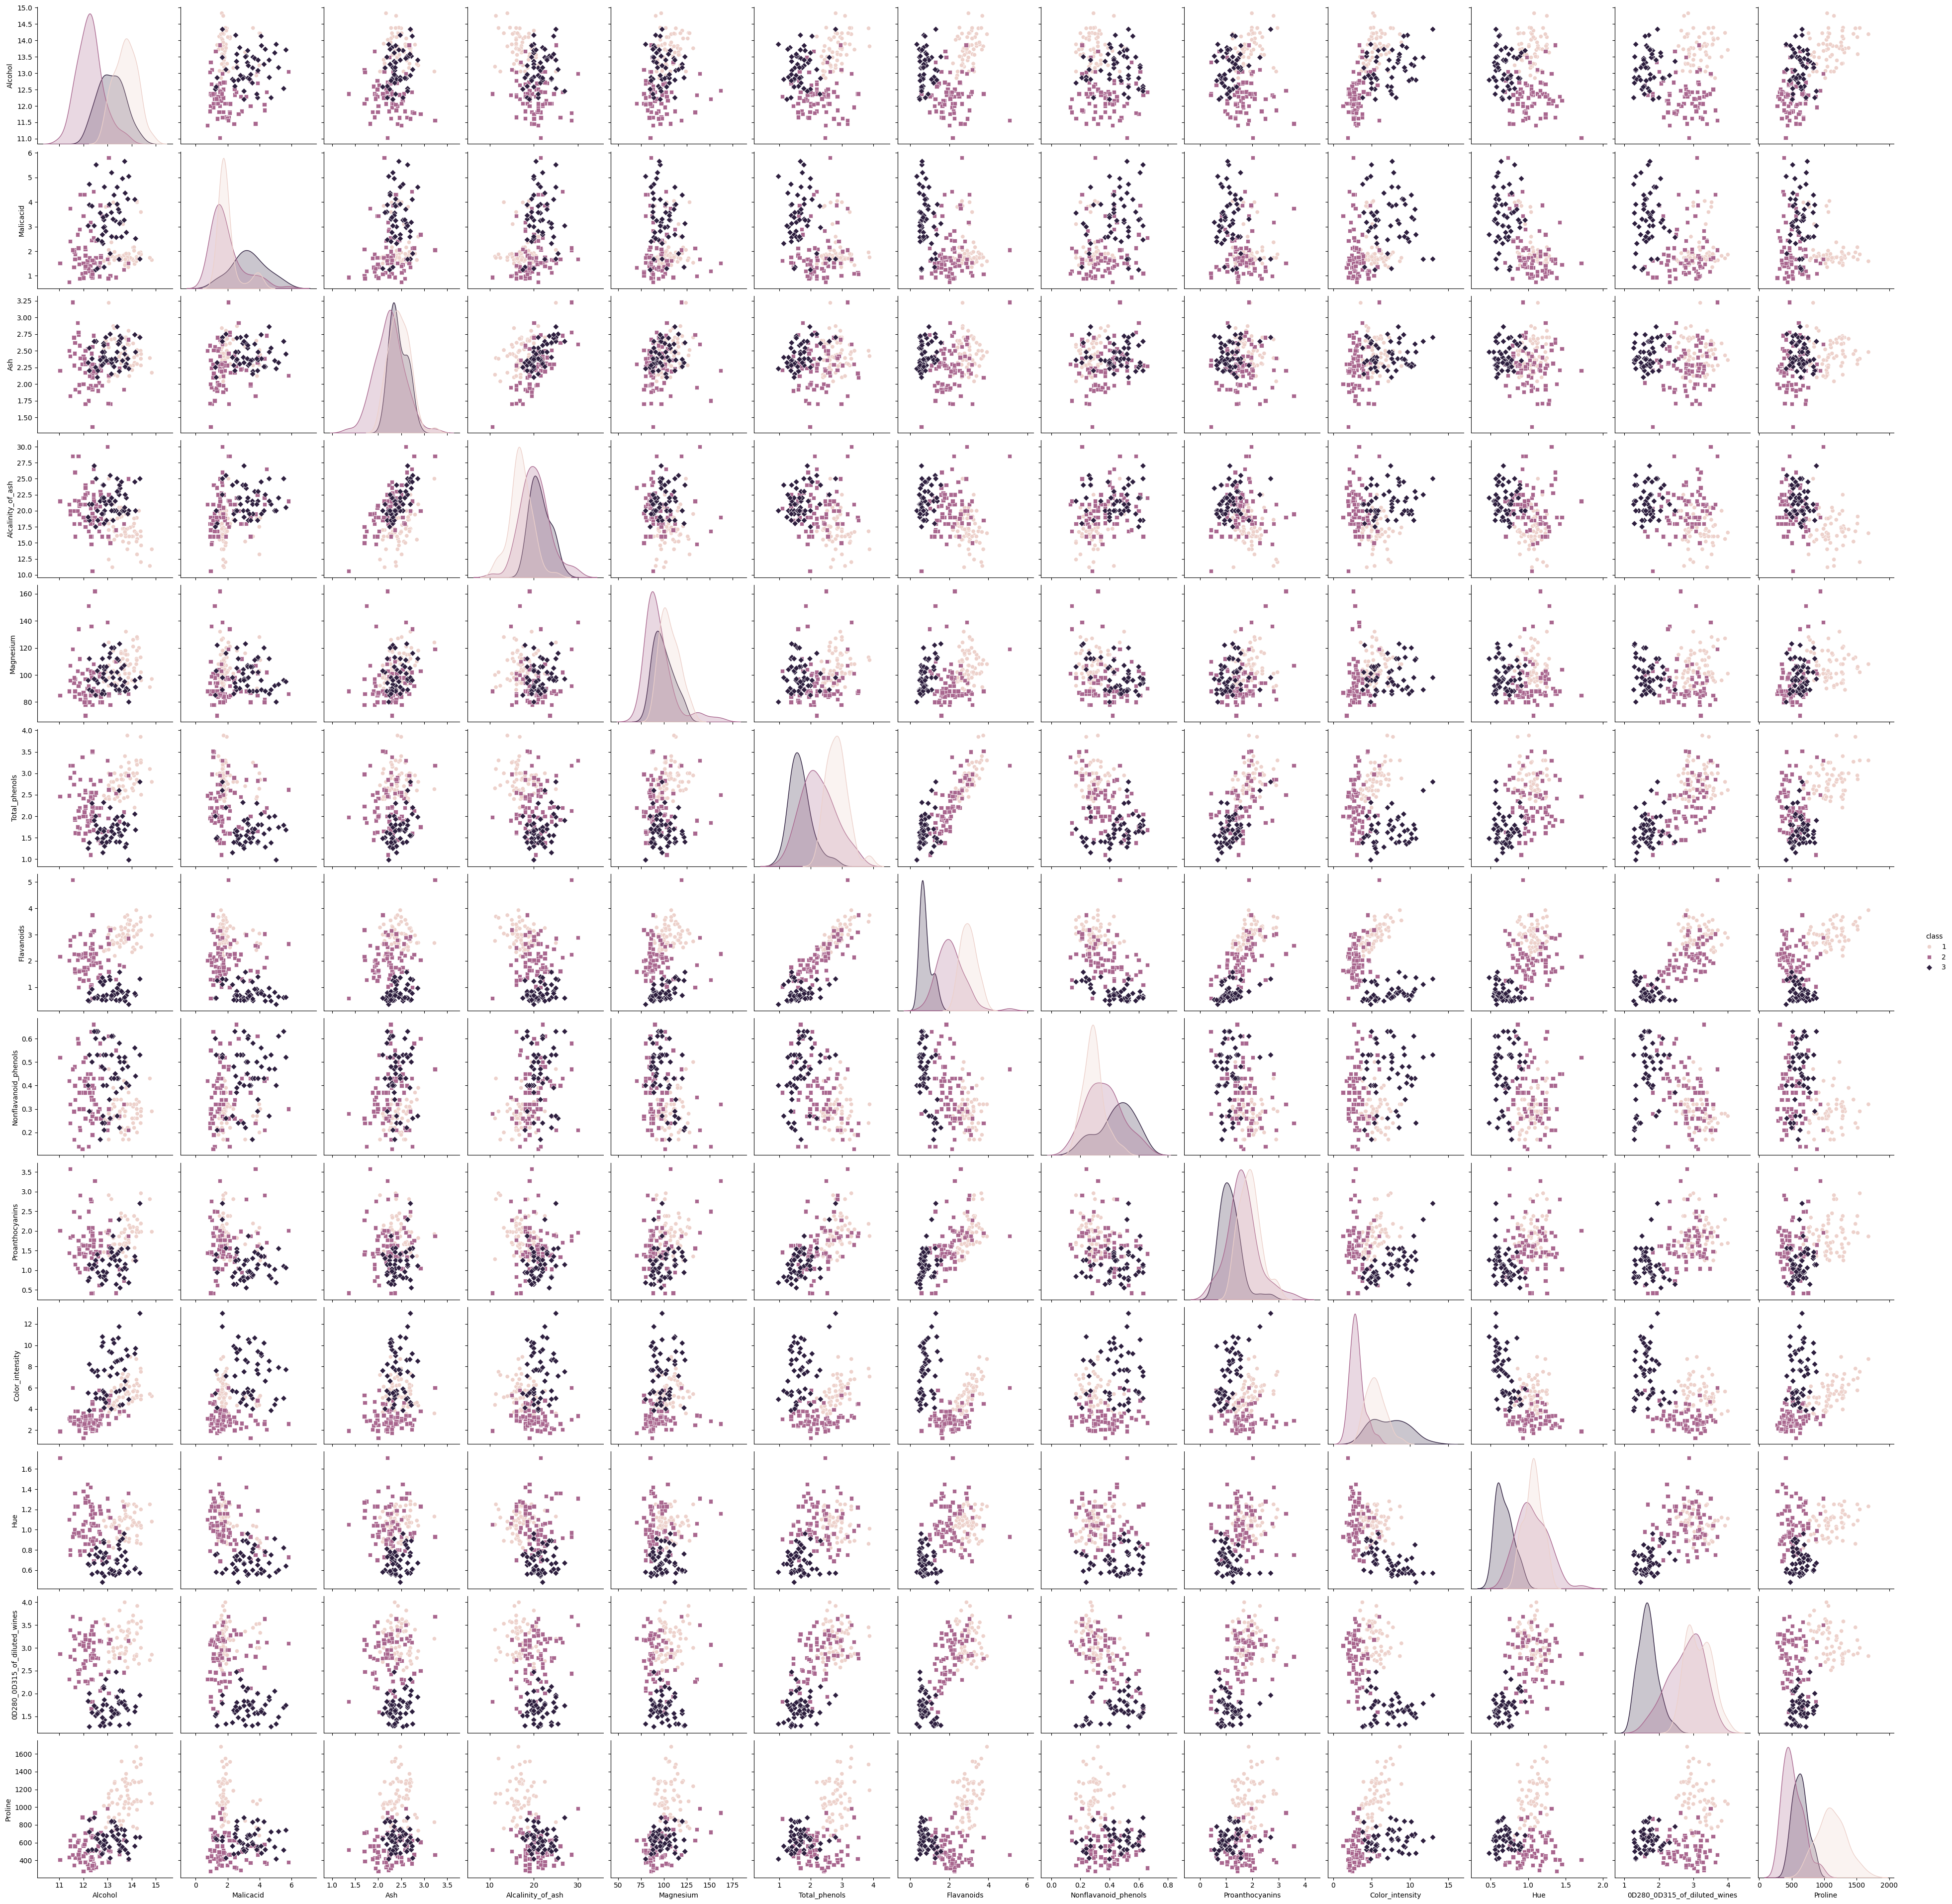

In [20]:
plt.figure()
sns.pairplot(dataset,hue="class",markers=["o","s","D"],size=3)
plt.show()

<Figure size 640x480 with 0 Axes>

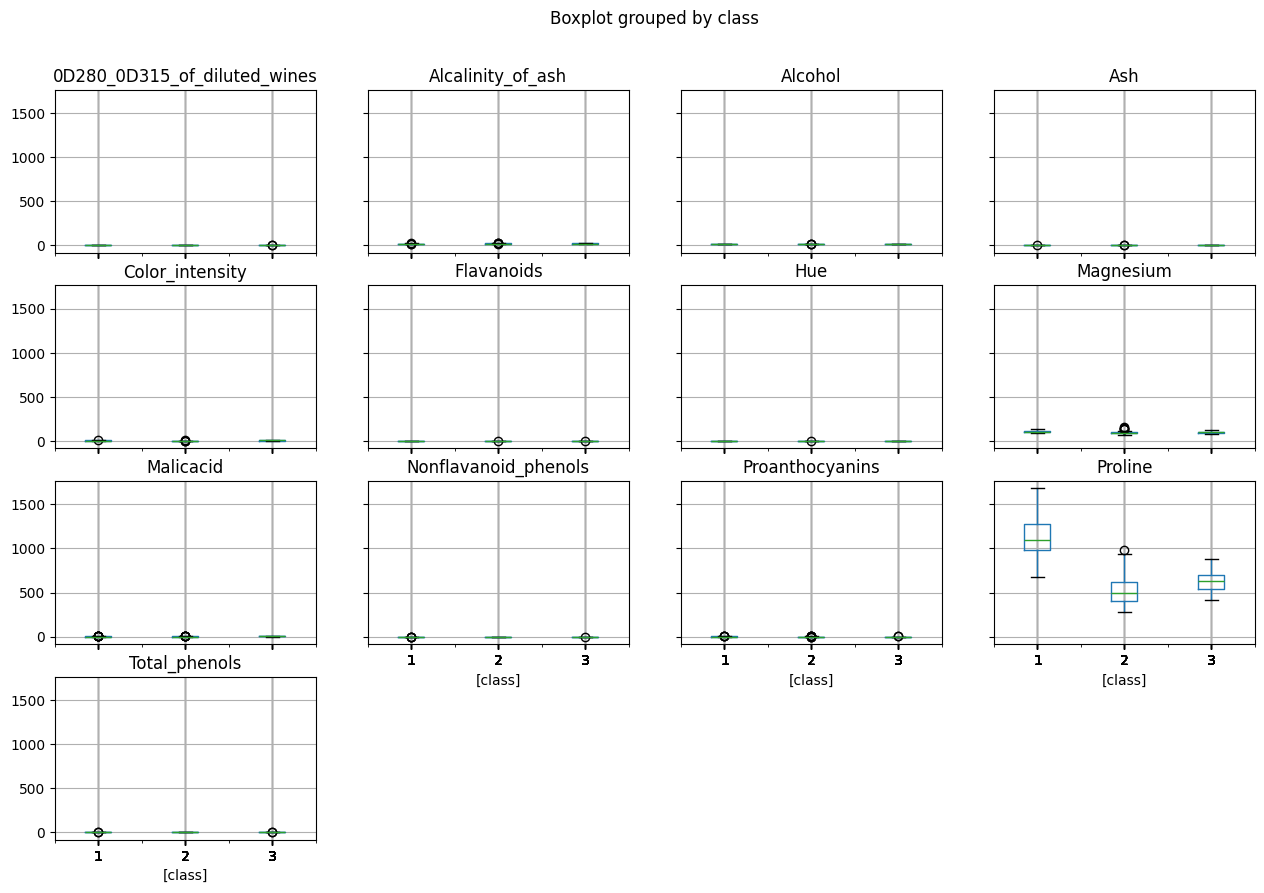

In [22]:
plt.figure()
dataset.boxplot(by="class",figsize=(15,10))# baktık ve sadece promil oranına gore sıralayabilecegimize karar verdik 
plt.show()

# datasette fit degil onu once fit hale getirelim 

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
type(features)

pandas.core.frame.DataFrame

In [33]:
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [34]:
features

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

# train test yapalım

In [23]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test=train_test_split(features,labels,test_size=0.4,random_state=4)

In [38]:
X_test.shape,X_train.shape,y_test.shape,y_train.shape

((72, 13), (106, 13), (72, 1), (106, 1))

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
def sklearn_knn(train_data,label_data,test_data,k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data,label_data)
    predict_label=knn.predict(test_data)
    return predict_label

In [55]:
y_pred=sklearn_knn(X_train,y_train,X_test,13)

In [56]:
y_pred

array([3, 3, 1, 1, 2, 3, 1, 2, 1, 2, 2, 1, 3, 3, 1, 2, 1, 2, 2, 3, 2, 3,
       2, 3, 1, 3, 2, 2, 3, 3, 1, 2, 1, 2, 3, 3, 1, 1, 1, 3, 3, 1, 1, 2,
       2, 1, 2, 3, 1, 3, 2, 2, 2, 1, 1, 2, 3, 2, 3, 3, 1, 3, 2, 2, 2, 1,
       3, 2, 2, 1, 2, 2], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy=accuracy_score(y_test,y_pred)*100# bu muko oranda dogruluk var muko 
accuracy

98.61111111111111

In [46]:
import math
math.sqrt(len(dataset))

13.341664064126334

In [52]:
k_value=range(1,15)
accur_history=[]
for k in k_value:
    y_demo=sklearn_knn(X_train,y_train,X_test,k)
    accur_history.append(accuracy_score(y_test,y_demo)*100)


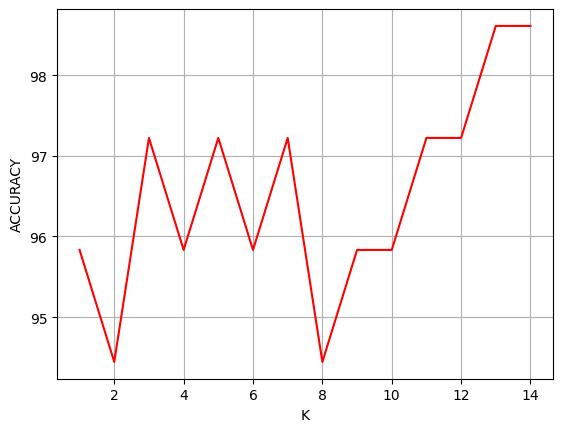

In [54]:
plt.figure()
plt.xlabel("K")
plt.ylabel("ACCURACY")
plt.plot(k_value,accur_history,c="r")
plt.grid(True)
plt.show()